## Data Analysis On Electric Vehicle 

- It involves using different graphs and plots to help visualise the data and also uses statistical methods to draw inferences from the data.

- The goal of this analysis is not to arrive at a certain right answer or to confirm a pre-defined hypothesis. It is an exploratory process to draw inferences and get ideas on how the data can be further utilised to predict certain outcomes/develop ML models

## Introduction to the Electric Vehicles

Which is the best electric car? What would be the best option for the x person? 

- Which car?
** Mileage/Range 
** Pricing 
** How many seats
- How far is the charging station?
** Charging for the price?
** If charging station is supercharge - DURATION?
- Does the car manufature give goverment subsidy?

## About Dataset

We will be downloading the electric vehicle manufature data set from: 
https://documenter.getpostman.com/view/3967924/RW1hhvSR#5977afdf-8740-401a-9fd5-e926c983aa52
- Get Dealers

https://rapidapi.com/letscrape-6bRBa3QguO5/api/ev-charge-finder
- Charging Location 

### PROJECT OUTINE

The steps involved in the process of Exploratory Data Analysis are.,

- Import the required libraries and its dependencies.

- Download the dataset.

- Data preparation and cleaning it.

- Exploratory Analysis.

- Ask and solve questions from the data.

- Pictorial representation of data using visualization techniques.

## Steps in Exploratory Data Analysis
* Select the real-world data set from Kaggle/any other source.
* Download the dataset and convert it into a Pandas DataFrame.
* Perform data cleaning/deal with missing values using Pandas and NumPy.
* Plot interactive graphs to understand the data using visual libraries like Plotly.
* Ask and Answer interesting questions from the dataset.
* Summarize your key inferences and state the conclusion.
* Elaborate on ideas for future work and quote references.

## Installing Packages and Importing Libraries

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import hvplot.pandas


In [2]:
# Import the Rapid API key
from config import RapidAPIKey

# Import the PostMate/MarketCheck API key

## Step 1: Download the dataset

In [3]:
csv_file_path = '../Project_1/Resources/Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(csv_file_path)
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159462,KM8JBDA2XP,Skamania,Underwood,WA,98651.0,2023,HYUNDAI,TUCSON,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,14.0,235949514,POINT (-121.5312858 45.7348285),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF S...,5.305995e+10
159463,1G1FZ6S02M,Skagit,Bow,WA,98232.0,2021,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,148544168,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
159464,YV4H60CX2P,King,Sammamish,WA,98029.0,2023,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,5.0,240200754,POINT (-121.9993659 47.5484866),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
159465,5YJ3E1EA7K,Whatcom,Bellingham,WA,98225.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,40.0,156680590,POINT (-122.486115 48.761615),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10


In [4]:
filtered_df = df[df['State'] == 'WA']
filtered_df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159462,KM8JBDA2XP,Skamania,Underwood,WA,98651.0,2023,HYUNDAI,TUCSON,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,14.0,235949514,POINT (-121.5312858 45.7348285),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF S...,5.305995e+10
159463,1G1FZ6S02M,Skagit,Bow,WA,98232.0,2021,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,148544168,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
159464,YV4H60CX2P,King,Sammamish,WA,98029.0,2023,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,5.0,240200754,POINT (-121.9993659 47.5484866),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
159465,5YJ3E1EA7K,Whatcom,Bellingham,WA,98225.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,40.0,156680590,POINT (-122.486115 48.761615),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10


In [5]:
selected_columns = ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year','Make', 'Model', 'Electric Vehicle Type']
compressed_df = filtered_df[selected_columns]
compressed_df

compressed_df.to_csv("Resources/washington_data_output.csv", index=False)

In [6]:
cities_df = filtered_df.groupby(['City', 'State']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)
cities_df

,City,State,VIN (1-10)
32,Bothell,WA,5176
429,Vancouver,WA,5599
331,Redmond,WA,5796
25,Bellevue,WA,8075
357,Seattle,WA,26932


In [7]:
cities_df.rename(columns={'VIN (1-10)': 'CarCount'})

,City,State,CarCount
32,Bothell,WA,5176
429,Vancouver,WA,5599
331,Redmond,WA,5796
25,Bellevue,WA,8075
357,Seattle,WA,26932


In [40]:
Seattle = filtered_df[filtered_df.City == "Seattle"].groupby(['Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)

In [41]:
Bothell = filtered_df[filtered_df.City == "Bothell"].groupby(['Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)

In [42]:
Vancouver = filtered_df[filtered_df.City == "Vancouver"].groupby(['Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)

In [43]:
Redmond = filtered_df[filtered_df.City == "Redmond"].groupby(['Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)

In [45]:
Bellevue = filtered_df[filtered_df.City == "Bellevue"].groupby(['Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)

In [49]:
merged_df = Seattle.merge(Bothell, on=['Make', 'Model'], how='outer').merge(Vancouver, on=['Make', 'Model'], how='outer').merge(Redmond, on=['Make', 'Model'], how='outer').merge(Bellevue, on=['Make', 'Model'], how='outer')


MergeError: Passing 'suffixes' which cause duplicate columns {'VIN (1-10)_x'} is not allowed.

In [21]:
filtered_df.groupby(['City','Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(10)
#df.groupby(['City','Electric Vehicle Type','Make','Model']).count()["VIN (1-10)"].reset_index()

,City,Make,Model,VIN (1-10)
9130,Seattle,CHEVROLET,BOLT EV,1256
8465,Redmond,TESLA,MODEL 3,1328
8995,Sammamish,TESLA,MODEL Y,1427
8468,Redmond,TESLA,MODEL Y,1625
1148,Bothell,TESLA,MODEL Y,1701
721,Bellevue,TESLA,MODEL 3,1829
724,Bellevue,TESLA,MODEL Y,2157
9190,Seattle,NISSAN,LEAF,2694
9206,Seattle,TESLA,MODEL Y,4447
9203,Seattle,TESLA,MODEL 3,4874


In [9]:
csv_file_path = '../Project_1/Resources/EV_personal_use_tax _incentives.csv'
tax_rebate_per_model_df = pd.read_csv(csv_file_path)
tax_rebate_per_model_df.head()



,manufacturer,model,model_year_introduced,curent_model-year,vehicle_type,tax_credit_amount,msrp_limit,assembled_in _usa
0,Audi,Q5 TFSI e Quattro (PHEV),NaN,2023,PHEV,7500,80000,True
1,BMW,330e,2021.0,2023,PHEV,5836,55000,True
2,BMW,X5 xDrive45e,2021.0,2023,PHEV,7500,80000,True
3,BMW,X5 xDrive50e,NaN,2024,PHEV,7500,80000,True
4,Cadillac,Lyriq,2022.0,2024,EV,7500,80000,True


In [10]:
selected_columns_for_tax_rebate_model= ['manufacturer', 'model', 'curent_model-year',
       'vehicle_type', 'tax_credit_amount', 'msrp_limit']
tax_rebate_model_compressed_df = tax_rebate_per_model_df[selected_columns_for_tax_rebate_model]
tax_rebate_model_compressed_df

tax_rebate_model_compressed_df.to_csv("Resources/tax_rebate_output.csv", index=False)

In [15]:
# List of cities
cities = ['Bothell, WA, USA', 'Vancouver, WA, USA', 'Redmond, WA, USA', 'Bellevue, WA, USA', 'Seattle, WA, USA']
limit = 100
# set up lists to hold response info
lat = []
temp = []
charging_data = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    url = "https://ev-charge-finder.p.rapidapi.com/search-by-location"

    querystring = {"near":city, "limit":limit}

    headers = {
	    "X-RapidAPI-Key": RapidAPIKey,
	    "X-RapidAPI-Host": "ev-charge-finder.p.rapidapi.com"
    }
    
    response = requests.get(url, headers=headers, params=querystring).json()
    if 'data' in response:
        data_point = response['data']

        for i in range(len(data_point)):
            name = (data_point[i]['name'])
            address = (data_point[i]['formatted_address'])
            latitude = (data_point[i]['latitude'])
            longitude = (data_point[i]['longitude'])
            try:
                charging_speed = (data_point[i]['connectors'][0]['speed'])
            except:
                charging_speed = "Not Applicable"

            charging_data.append({"name": name, 
                                "near": city,
                                "Address": address, 
                                "Lat": latitude, 
                                "Lng": longitude ,
                                "Charging Speed": charging_speed})
charging_data_df = pd.DataFrame(charging_data)

charging_data_df

charging_data_df.to_csv("output_data/chargers_output.csv", index=False)

## Step 3: Data Analysis

## Step 4: Question 1: Data Visualization

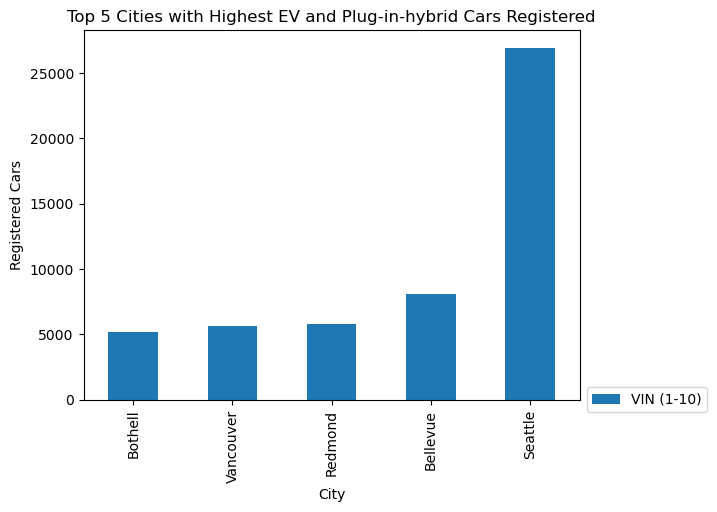

In [13]:
# Filter the DataFrame
top_cities = cities_df[cities_df['VIN (1-10)'] > 5000]

# Select the 'City' and 'VIN (1-10)' columns for plotting
top_cities = top_cities[['City', 'VIN (1-10)']]

# Plot the data
top_cities.plot(x='City', y='VIN (1-10)', kind='bar')

# Set plot labels and rotation
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Registered Cars')
plt.title('Top 5 Cities with Highest EV and Plug-in-hybrid Cars Registered')
plt.legend('CarCount')
plt.legend(loc='center left', bbox_to_anchor=(1, 0))


#save the plot
plt.savefig("output_data/Top 5 Cities.png")

# Show the plot
plt.show()

In [16]:
chargers_df = charging_data_df.groupby(['near']).count()['name'].reset_index().sort_values(by="near").tail(5)
chargers_df

,near,name
0,"Bellevue, WA, USA",85
1,"Bothell, WA, USA",89
2,"Redmond, WA, USA",88
3,"Seattle, WA, USA",73
4,"Vancouver, WA, USA",82


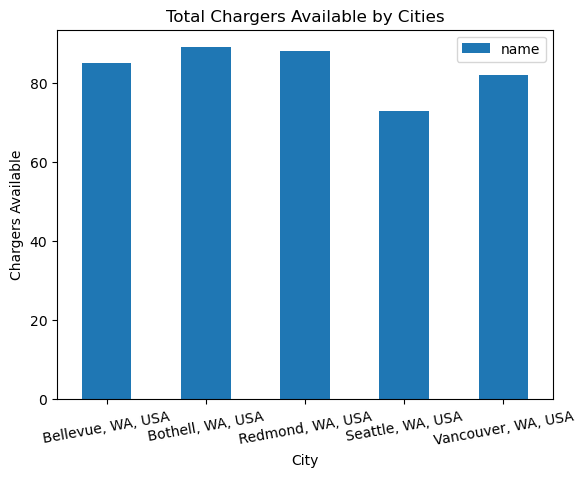

In [17]:
# Select the 'City' and 'VIN (1-10)' columns for plotting
#chargers_df = chargers_df[['near', 'name']]

# Plot the data
chargers_df.plot(x='near', y='name', kind='bar', align='center')

# Set plot labels and rotation
plt.xlabel('City')
plt.xticks(rotation=10)
plt.ylabel('Chargers Available')
plt.title('Total Chargers Available by Cities')
frame_width = 800,
frame_height = 700,

#save the plot
plt.savefig("output_data/Total Chargers Available by Cities.png")

# Show the plot
plt.show()

## Ask & answer questions

## Conclusion